# Select and visualize controls 

Both ADAGE and SOPHIE support/require differential expression analysis.
A set of samples are compared against another set, producing differentially expressed genes or pathways.
This notebook identifies publicly available PAO1 and PA14 samples to use as controls against which to compare publicly available sputum samples and hogan lab samples cultivated in sputum.

Selection criteria:
+ publicly available
+ in the compendium (not filtered for too many zeros or too low expression of house keeping genes. Note I dropped the house keeping gene filter from 0.2 to 0.08 to make sure some of the Hogan lab sample controls (M63, ASM*) weren't dropped.).
+ wild type
+ cultivated in LB medium
+ minimum of biological duplicates
+ no technical replicates

In [1]:
setwd("..")

In [2]:
# adjust plot size rendered inline
options(repr.plot.width = 7, repr.plot.height = 3.5, repr.plot.res = 300)

In [4]:
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(tibble)
library(janitor)
library(ggplot2)
library(ggpubr)

## Read in publicly available metadata and separate by strain

In [5]:
# read in strain annotations and separate strains PA14 and PAO1
strain_annotations <- read_tsv("inputs/original_compendia/SRA_annotations.tsv", show_col_types = F) %>%
  clean_names()

pa14_samples <- strain_annotations %>%
  filter(strain_type == "PA14")

pao1_samples <- strain_annotations %>%
  filter(strain_type == "PAO1")

In [6]:
# read in SRA run table and separate by strain annotations
runtable <- read_csv("inputs/original_compendia/SraRunTable.csv", show_col_types = F) %>%
  clean_names() %>%
  select(-x1)

runtable_pa14 <- runtable %>%
  filter(experiment %in% pa14_samples$experiment) %>%
  rename(grepl_source_name = source_name, grepl_sample_type = sample_type, 
         grepl_library_name = library_name, grepl_growth_condition = growth_condition) # rename columns for grepl

runtable_pao1 <- runtable %>%
  filter(experiment %in% pao1_samples$experiment) %>%
  rename(grepl_source_name = source_name, grepl_sample_type = sample_type, 
         grepl_library_name = library_name, grepl_growth_condition = growth_condition) # rename columns for grepl

New names:
• `` -> `...1`


## Find PA14 controls

In [7]:
runtable_pa14 %>%
  rowwise() %>%   # rowwise grouping
  filter(any(grepl("wt|wild type|wildtype|WT|ctrl|ontrol|LB|ysogeny", c_across(starts_with("grepl"))))) %>% # aiming for "wild type", but also matches "growth"
  select(experiment, run, bio_project, starts_with("grepl"))

experiment,run,bio_project,grepl_source_name,grepl_library_name,grepl_sample_type,grepl_growth_condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRX4641859,SRR7786912,PRJNA489391,NA,LB Urea 2,Cell culture,NA
SRX4641858,SRR7786913,PRJNA489391,NA,LB Urea 1,Cell culture,NA
SRX4641857,SRR7786914,PRJNA489391,NA,LB 2,Cell culture,NA
SRX4641856,SRR7786915,PRJNA489391,NA,LB 1,Cell culture,NA
SRX691231,SRR1563139,PRJNA260130,NA,Control 1,missing,NA
SRX470319,SRR1168634,PRJNA238229,PA14_AlgU_wildtype,NA,PA14 bacterial culture,NA
SRX470320,SRR1168635,PRJNA238229,PA14_AlgU_wildtype,NA,PA14 bacterial culture,NA
SRX470329,SRR1168644,PRJNA238229,PA14_FecI2_wildtype,NA,PA14 bacterial culture,NA
SRX470336,SRR1168651,PRJNA238229,PA14_FliA_wildtype,NA,PA14 bacterial culture,NA


### PA14 notes

+ **PRJNA489391**: 
    + Strains were grown in LB medium (also strains grown in PBS-T)
    + RNA isolated with RNeasy Mini Kit
    + Ribosomal RNA removed from total RNA using the Epicentre Ribo-Zero Magnetic Kit 
    + https://doi.org/10.1038/s41467-018-06882-y
    + suitable controls: SRX4641857, SRX4641858
+ **PRJNA238223**
    + Control samples cultivated in LB medium until exponential or stationary growth phase.
    + Four biological replicas were pooled in pairs to get two replicas for RNA extraction, library preparation and sequencing.
    + selected stationary growth (labelled as if there should be exponential, but couldn't find exponential)
    + couldn't find publication
    + suitable controls: SRX470385, SRX470386 (stationary phase), SRX470383, SRX470384 (exponential growth)
+ **PRJNA616314**
    + "Planktonic cultures were inoculated with single colonies of P. aeruginosa strain PA14 and incubated overnight in lysogenic broth (LB) at 37 °C while shaking at 180 r.p.m. Subsequent main cultures were inoculated at an OD 600 of 0.05 in LB and grown at 37 °C while shaking at 180 r.p.m. until they reached OD 600=2.0±0.1 (late exponential phase) or for 12 h(stationary phase)."
    + Ribo-off rRNA Depletion Kit
    + 10.1099/acmi.0.000159
    + selected stationary phase and exponential phase, tech rep 1s 
    + suitable controls: SRX8030422 SRX8030424 (stationary phase), SRX8030426, SRX8030428 (exponential phase)
+ **PRJNA594638**
    + "Pseudomonas strains were grown in LB medium (with 7.5 g/l NaCl) at 37°C. Overnight cultures were sub-cultured and grown for 3.5 hr to mid-log phase. Following growth, bacteria were washed twice and adjusted to the desired OD600 in pyrogen-free PBS. Plating served as control. The vector pSEVA2513 (oriT, PEM7, KmR) was used to complement fliC in the deletion strain (Durante-Rodríguez et al., 2014; Silva-Rocha et al., 2013). 500 µg/ml kanamycin was supplemented to the cultures to maintain the plasmid in the P. aeruginosa strains."
    + Planktonic cultures: Subcultures of Pseudomonas strains were grown to OD = 2, cell pellets were subsequently treated with RNAprotect and the RNA isolated as previously described (Kordes et al., 2019).
    + selected mid log phase
    + 10.7554/eLife.55744
    + suitable controls: SRX7299397, SRX7299398
+ **PRJNA269980**
    + "Bacterial strains and plasmids used in this study are listed in Supplementary Table S1. P. aeruginosa strains (PA14 and PAO1) were cultivated in lysogeny broth (LB) at 37°C with shaking at 180 rpm."
    + "For mRNA profiling, two independent experiments were performed and each experiment included pooling of three individual main cultures. RNA was prepared from PA14 wild-type, PA14 tctD::Tn and PA14 ΔPhoB strains grown in DeMoss medium under low phosphate concentrations. RNA extraction, cDNA library preparation and deep sequencing were performed as previously described (29). In brief, cells were harvested after addition of RNA protect buffer (Qiagen) and RNA was isolated from cell pellets using the RNeasy plus kit (Qiagen). mRNA was enriched (MICROBExpress kit (Ambion))"
    + 10.1093/nar/gkv599
    + not clear what growth phase
    + suitable controls: SRX804118, SRX804119
+ **PRJNA238880**
    + "Furthermore, RNA sequencing data of the P. aeruginosa PA14 reference strain cultivated under 14 different growth conditions (a total of 51 samples) were used in the global gene expression analysis in this study. Those conditions included growth within biofilms, at various temperatures, growth phases, osmolarities, phosphate and iron concentrations, under anaerobic conditions, attached to a surface, and conditions encountered within the eukaryotic host. The P. aeruginosa PA14 transcriptome sequencing (RNA-seq) data have in part been generated in the context of previous studies in our lab (18–21) and are accessible as a single data set from the GEO database under the accession number GSE55197. Four replicates of PA14 that are available under the accession number SRP034661 (genome data set) were included in 51 samples used for this part of this analysis. Details on the culture conditions of strain PA14 to generate environment-driven differentials in gene expression as well as the differential gene expression profiles on single or groups of PA14 strains can be explored via the web-based Bactome database (https://bactome.helmholtz-hzi.de)."
    + exponential growth and stationary growth
    + 10.1128/mBio.00749-15
    + suitable controls: SRX474156, SRX474157 (stationary growth), SRX474130, SRX474131 (exponential growth)

### Visualize sputum samples vs. identified controls

Reads in the filtered and normalized compendium and uses PCA (`prcomp`) to perform PCA analysis.
PC1-PC4 are visualized at the bottom, colored by growth type.

In [8]:
compendium_pa14 <- read_csv("outputs/filt_norm_compendia/pa14_aligned_compendium_p2_filtered_counts_norm.csv", show_col_types = F) %>%
  rename(gene = `...1`)

New names:
• `` -> `...1`


In [11]:
# make a dataframe labelling sample types
pa14_metadata <- data.frame(experiment = c('SRX474156', 'SRX474157', 'SRX8030422', 'SRX8030424',
                                           'SRX474130', 'SRX474131', 'SRX7299397', 'SRX7299398',
                                           'SRX8030426', 'SRX8030428', 'SRX470383', 'SRX470384',
                                           'SRX804118', 'SRX804119', 'SRX4641857', 'SRX4641858'),
                            growth = c('stationary', 'stationary', 'stationary', 'stationary',
                                       'exponential', 'exponential', 'exponential', 'exponential',
                                       'exponential', 'exponential', 'exponential', 'exponential',
                                       'unclear', 'unclear', 'unclear', 'unclear'),
                            type = c('control', 'control', 'control', 'control',
                                     'control', 'control', 'control', 'control',
                                     'control', 'control', 'control', 'control',
                                     'control', 'control', 'control', 'control'))

hogan_metadata <- read_csv("inputs/hogan_metadata.csv", show_col_types = F) %>%
  select(experiment = sample) %>%
  mutate(experiment = toupper(experiment),
         growth = "unclear", 
         tmp_type = ifelse(grepl("^ASM", experiment), "ASM",
                           ifelse(grepl("^M63", experiment), "M63", "ex vivo")),
         tmp_metals = ifelse(grepl("_M", experiment), "metals", ""),
         type = trimws(paste(tmp_type, tmp_metals))) %>%
  select(-tmp_type, -tmp_metals)

public_metadata <- read_csv("inputs/metadata.csv", show_col_types = F) %>%
  filter(pa_in_reads == TRUE) %>%
  select(experiment = experiment_accession) %>%
  mutate(growth = "unclear",
         type = "sputum")

pa14_metadata <- bind_rows(pa14_metadata, hogan_metadata, public_metadata) %>%
  filter(experiment %in% colnames(compendium_pa14)) # remove samples that were filtered from compendium

In [12]:
table(pa14_metadata$type)


           ASM     ASM metals        control        ex vivo ex vivo metals 
             3              3             15             18             18 
           M63         sputum 
             3             27 

In [13]:
compendium_pa14_filt <- compendium_pa14 %>%
  column_to_rownames("gene") %>%
  select(pa14_metadata$experiment)

In [14]:
pc_pa14 <- prcomp(t(compendium_pa14_filt),
                  center = TRUE,
                  scale = TRUE)

In [15]:
pc_pa14_df <- data.frame(pc_pa14$x) %>%
  rownames_to_column("experiment") %>%
  left_join(pa14_metadata)

pc_pa14_df$type <- factor(pc_pa14_df$type, levels = c("ex vivo", "ex vivo metals", 
                                                      "ASM", "ASM metals", 
                                                      "M63", "control", "sputum"))

Joining, by = "experiment"


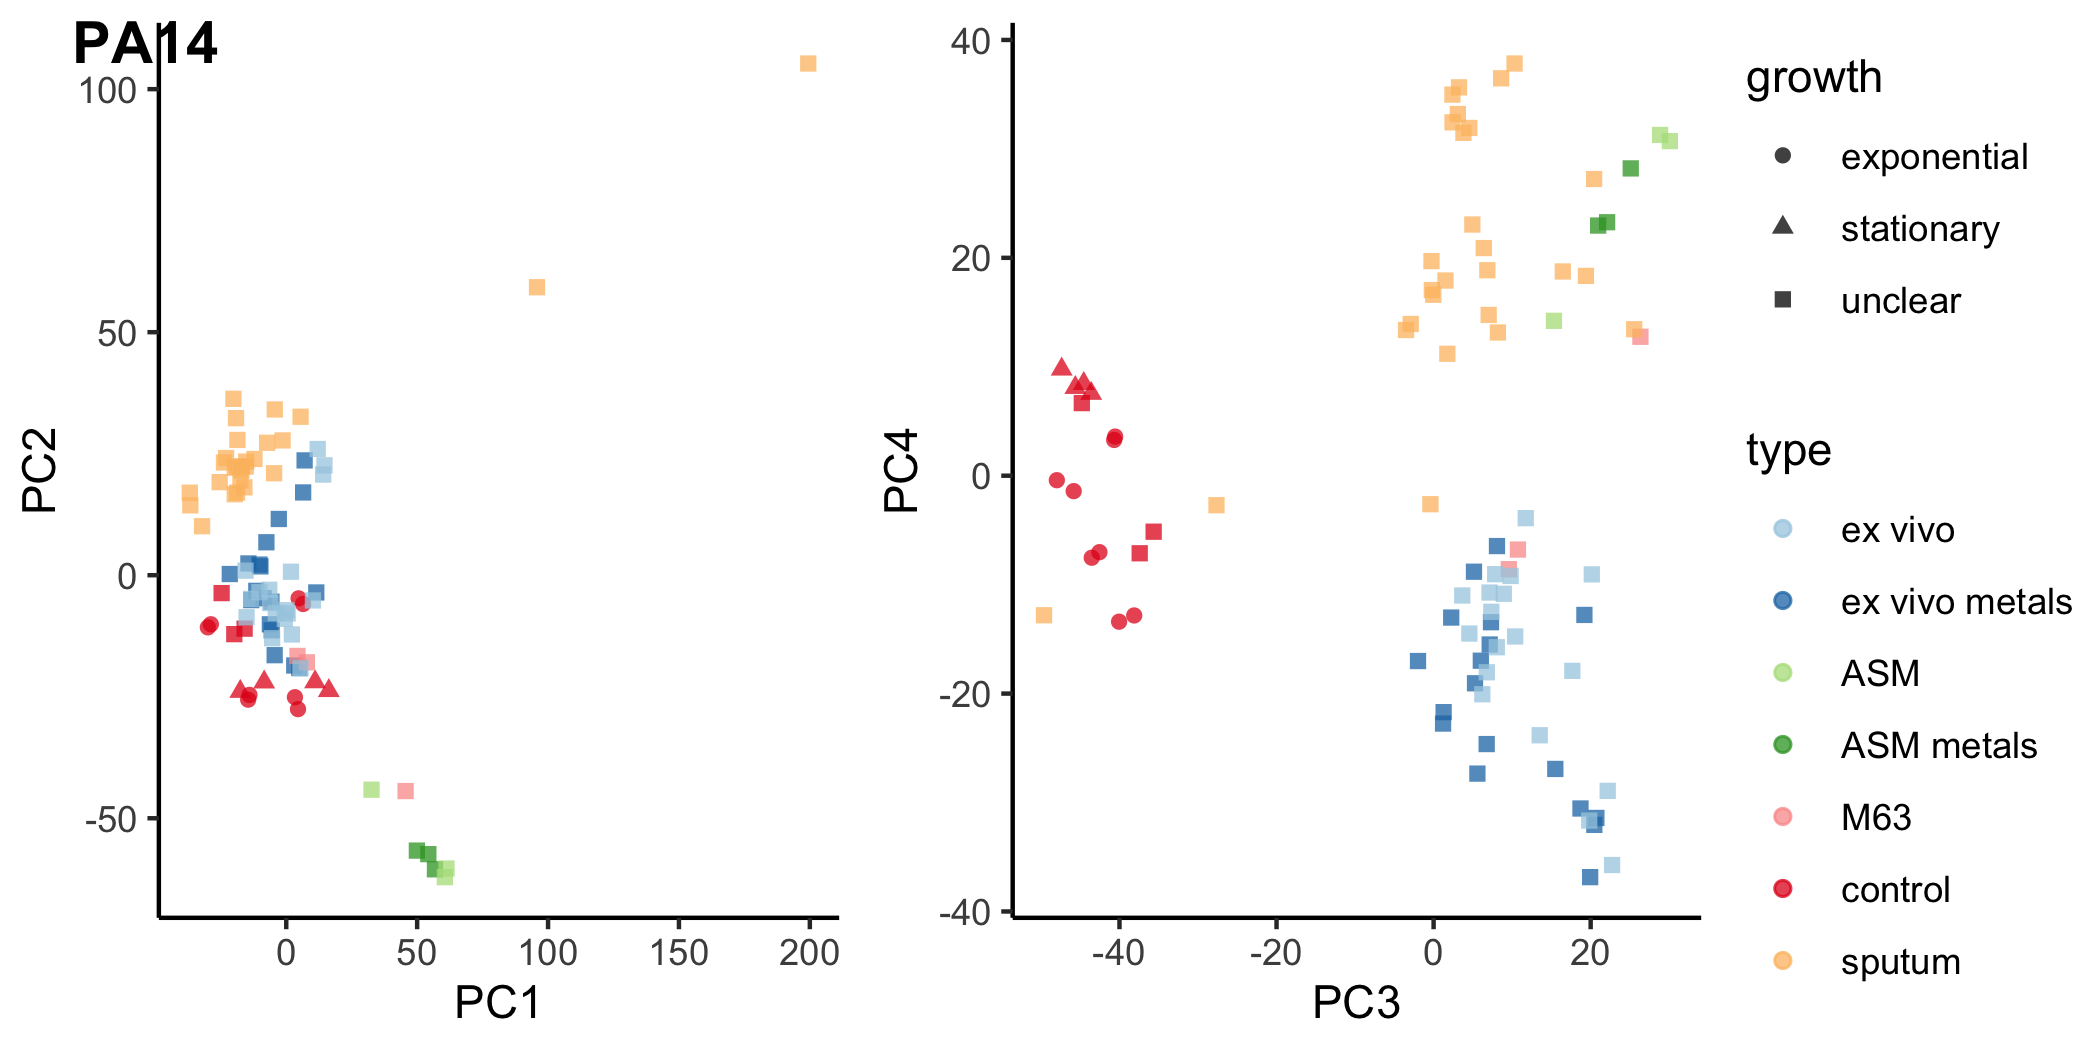

In [16]:
pc1_pc2_plt <- ggplot(pc_pa14_df, aes(x = PC1, y = PC2, color = type, shape = growth)) + 
  geom_point(alpha = .75) +
  theme_classic() +
  scale_color_brewer(palette = "Paired")

pc3_pc4_plt <- ggplot(pc_pa14_df, aes(x = PC3, y = PC4, color = type, shape = growth)) + 
  geom_point(alpha = .75) +
  theme_classic() +
  scale_color_brewer(palette = "Paired")

ggarrange(pc1_pc2_plt, pc3_pc4_plt, common.legend = T, legend = "right", labels = c("PA14", ""))

## Find PAO1 controls

In [17]:
runtable_pao1 %>%
  rowwise() %>%   # rowwise grouping
  filter(any(grepl("wt|wild type|wildtype|WT|ctrl|ontrol|LB|ysogeny", c_across(starts_with("grepl"))))) %>% # grepl on multiple conditions across columns that start with "grepl"
  select(experiment, run, bio_project, starts_with("grepl")) # retain only columns with metadata about strain conditions

experiment,run,bio_project,grepl_source_name,grepl_library_name,grepl_sample_type,grepl_growth_condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRX4579961,SRR7723449,PRJNA486815,Transcriptome of control of P. aeruginosa PAO1,NA,NA,NA
SRX4579962,SRR7723450,PRJNA486815,Transcriptome of control of P. aeruginosa PAO1,NA,NA,NA
SRX4579963,SRR7723451,PRJNA486815,Transcriptome of control of P. aeruginosa PAO1,NA,NA,NA
ERX2068559,ERR2008796,PRJEB21307,NA,PAO1_WT_1_p,NA,Luria-Bertani medium. 37C. Shaking 150 rpm.
ERX2068560,ERR2008797,PRJEB21307,NA,PAO1_WT_2_p,NA,Luria-Bertani medium. 37C. Shaking 150 rpm.
ERX2068561,ERR2008798,PRJEB21307,NA,PAO1_WT_3_p,NA,Luria-Bertani medium. 37C. Shaking 150 rpm.
SRX4884852,SRR8055264,PRJNA496467,liquid culture in LB (Luria-Bertani) medium,NA,NA,NA
SRX4884853,SRR8055265,PRJNA496467,liquid culture in LB (Luria-Bertani) medium,NA,NA,NA
SRX4884854,SRR8055266,PRJNA496467,liquid culture in LB (Luria-Bertani) medium,NA,NA,NA


+ **PRJNA287707** 
    + "Bacterial strains, plasmids, media, and growth conditions: The prototrophic P. aeruginosa strain PAO1 [38] was used in all experiments. PAO1 cultures were grown overnight in Luria-Bertani broth (LBB) at 37°C with shaking at 200 RPM. Aliquots of the overnight cultures were pelleted by centrifugation at ~15000 × g for 1 min, the supernatant was discarded, and the pellet was resuspended in fresh LBB to a final OD600 of 0.02–0.03 (3.0 × 107 to 5.0 × 107 CFU/mL)."
    + "RNA isolation: For isolation of RNA for RNA-Seq or qRT-PCR, cultures were harvested at specific time points, from 2 h to 12 h depending on the experiment, within the growth cycle of PAO1. For blood cultures, red and white blood cells were removed by differential centrifugation in lymphocyte separation medium (Lonza, Walkersville, MD) as previously described [37]. PAO1 cells were pelleted by centrifugation at 5,000 RPM for 10 min and resuspended in fresh LBB containing RNAprotect (QIAGEN, Valencia, CA). The supernatant was discarded, and pellets were stored at -80°C. RNA was extracted from these pellets using the RNAeasy Mini Kit (QIAGEN)."
    + 10.1371/journal.pone.0240351
    + suitable controls: SRX8487076, SRX8487077, SRX8487078
+ **PRJNA486815**
    + "Luria-Bertani medium (50 mL) was inoculated with exponential growth phase P. aeruginosa PAO1 at a concentration of 108 CFU/mL. DADS was then added at a concentration of either 0 (control) or 0.64 mg/mL, in triplicate. All six experiment groups were incubated in a water bath shaker at 37°C with a shaking rate of 180 rpm for 5 h. Cells were then sampled and centrifuged from the three control groups and three DADS treatment groups. The cell precipitates in the control and DADS-treated groups were separately snap-frozen at -80°C."
    + "RNA Sample Preparation: Total RNA was isolated from cells using TRIzol (ThermoFisher Scientific, Inc., United States) according to the manufacturer’s protocol. RNA purity was determined using a NanoPhotometer spectrophotometer (IMPLEN, CA, United States). All RNA samples had an A260:A280 ratio between 1.8 and 2.0. RNA concentration was measured using a Qubit RNA Assay Kit with a Qubit 2.0 Fluorometer (Life Technologies, CA, United States). RNA integrity was evaluated using the RNA Nano 6000 Assay Kit of the Agilent Bioanalyzer 2100 system (Agilent Technologies, CA, United States); all samples had RNA integrity > 7.0."
    + 10.3389/fmicb.2018.03222
    + suitable controls: SRX4579961, SRX4579962, SRX4579963
+ **PRJEB21307**
    + LB medium @ 37C, shaking 150 rpm
    + harvested during mid-log phase at OD600 0.5.
    + couldn't find publication
    + suitable controls: ERX2068559, ERX2068560, ERX2068561
+ **PRJEB28696**
    + "Unless indicated otherwise, the cultures were grown aerobically at 37°C in Luria–Bertani (LB; Miller, 1972) broth supplemented with appropriate antibiotics."
    + "Total RNA was isolated using the hot phenol method as described by Leoni et al. (1996). Briefly, the cells were harvested by centrifugation. The pellet was resuspended in 50 μl DEPC treated ddH2O and mixed with pre-heated (65°C) 250 μl lysis buffer and 500 μl phenol (pH 5.5) and vigorously vortexed. After centrifugation (5 min at 16,000 g), the aqueous phase was extracted with an equal volume of phenol/chloroform (1:1), re-centrifuged, and then extracted with an equal volume of chloroform. The RNA was precipitated over-night at -20°C, by addition of 0.1 volume of 3 M Na-acetate (pH 5.5) and 2.5 volumes of 96% ethanol. Removal of DNA was achieved by multiple rounds of TURBO DNase I (ThermoFisher) treatment followed by phenol chloroform extraction and Na-acetate/ethanol precipitation."
    + "PAO1ΔreaL(pKH6) and PAO1ΔreaL(pKH6-ReaL) were grown in LB medium supplemented with 50 μg/ml gentamycin until they reached an OD600 of 2.5. ReaL synthesis was induced with L-arabinose (final concentration 0.2%). After 30 min, total RNA was isolated from three biological replicates of either strain as described above. Ribosomal RNA was depleted with the Ribo-Zero rRNA Removal Kit (Illumina). Then, libraries were prepared using the NEBNext Ultra Directional RNA Library Prep Kit (Illumina) and sequenced using the Illumina HiSeq 2000, 100 bp single end read platform at the Vienna Biocentre Core Facilities" (Note i think there is a typo in the methods and the first strain indicated was actually just wildtype)
    + 10.3389/fmicb.2018.02488
    + suitable controls: ERX2813653, ERX2813654, ERX2813655
+ ~**PRJNA496467**~
    + "The bacterial strains, plasmids and primers are used in this study are listed in Supplementary Data 5. The P. aeruginosa PAO1 strain and its derivatives were grown at 37 °C in LB (Luria-Bertani) broth with shaking at 220 rpm or on LB agar plates. Antibiotics were used for Escherichia coli at the following concentrations: kanamycin at 50 μg/ml and ampicillin at 100 μg/ml."
    + "To examine the effect of TFs (taking an example of RpoN) on the transcriptome, 2 ml of mid-log-phase (OD600 = 0.6) bacterial cultures (PAO1 and TF mutant strains) were collected by centrifugation (12,000 rpm, 4 °C). A RNeasy mini kit (Qiagen) was used for subsequent RNA purification with DNaseI (NEB) treatment. After removing rRNA by using the MICROBExpress kit (Ambion), mRNA was used to generate the cDNA library according to the NEBNext® UltraTM II RNA Library Prep Kit protocol (Illumina), which was then sequenced using the HiSeq 2000 system (Illumina). Each sample in RNA-seq assay was repeated twice."
    + 10.1038/s41467-019-10778-w
    + suitable controls: NA -- not labelled sufficiently to know what was WT
+ **PRJNA649981**
    + "P. aeruginosa strains were grown from overnight cultures diluted to an OD600 of 0.1 in 3 ml of fresh LB medium at 37°C under agitation in duplicate. Total RNA was isolated at an OD600 of 1.0 using hot phenol-chloroform extraction as previously described (8)."
    + "RNA-seq library construction, sequencing, and data analysis. After RNA isolation and DNase treatment, RNA sample quality was assessed on an Agilent Bioanalyzer, yielding RNA integrity numbers (RINs) of 9 or higher. Then, rRNAs were depleted using the RiboMinus transcriptome isolation kit (ThermoFisher) following manufacturer instructions. The cDNA libraries were then constructed from 50 ng of depleted RNA using the NEBNext Ultra II directional RNA library prep kit following manufacturer instructions (New England Biolabs)."
    + 10.1128/mSystems.00753-20
    + suitable controls: SRX8862509, SRX8862510
+ **PRJNA576918**
    +  "Methods:LB medium (50 mL) was inoculated with exponential growth phase P. aeruginosa PAO1 at a concentration of 108 CFU/mL. Farnesol was then added at a concentration of either 0 (control) or 0.56 mg/mL, in triplicate. All six experiment groups were incubated in a water bath shaker at 37 ºC with a shaking rate of 180 rpm for 5 h. Cells were then sampled and centrifuged from the three control groups and three farnesol treatment groups, respectively. The cell precipitates were separately snap-frozen at -80ºC. Total RNA was isolated from cells using Trizol (Life Technologies, USA) according to the manufacturer’s protocol."
    + 10.1016/j.ibiod.2020.104956
    + suitable controls: SRX6976948, SRX6976949, SRX6976950
+ **PRJNA531832**
    + "The wild-type and ΔanvM strains were cultured in LB medium until an optical density at 600 nm (OD600) of 0.6 was reached. Then, 2-ml volumes of bacterial cultures were collected by centrifugation (12,000 rpm, 4°C). RNA purification was conducted by the use of an RNeasy minikit (Qiagen). After removal of rRNA by the use of a MICROBExpress kit (Ambion), mRNA was used to generate the cDNA library according to the NEBNext Ultra II RNA library prep kit protocol (NEB), which was then sequenced using a HiSeq 2000 system (Illumina)."
    + 10.1128/mBio.01362-19
    + suitable controls: SRX5661364, SRX5661363

In [18]:
compendium_pao1 <- read_csv("outputs/filt_norm_compendia/pao1_aligned_compendium_p2_filtered_counts_norm.csv", show_col_types = F) %>%
  rename(gene = `...1`)

New names:
• `` -> `...1`


In [19]:
# make a dataframe labelling sample types
pao1_metadata <- data.frame(experiment = c('SRX5661364', 'SRX5661363', 
                                           'SRX6976948', 'SRX6976949', 'SRX6976950',
                                           'SRX8862509', 'SRX8862510',
                                           'ERX2813653', 'ERX2813654', 'ERX2813655',
                                           'ERX2068559', 'ERX2068560', 'ERX2068561',
                                           'SRX4579961', 'SRX4579962', 'SRX4579963',
                                           'SRX8487076', 'SRX8487077', 'SRX8487078'),
                            growth = NA,
                            type = c('control', 'control',
                                     'control', 'control', 'control',
                                     'control', 'control',
                                     'control', 'control', 'control', 
                                     'control', 'control', 'control',
                                     'control', 'control', 'control',
                                     'control', 'control', 'control'))

pao1_metadata <- bind_rows(pao1_metadata, hogan_metadata, public_metadata) %>%
  filter(experiment %in% colnames(compendium_pao1)) # remove samples that were filtered from compendium

In [20]:
compendium_pao1_filt <- compendium_pao1 %>%
  column_to_rownames("gene") %>%
  select(pao1_metadata$experiment)

In [21]:
pc_pao1 <- prcomp(t(compendium_pao1_filt),
                  center = TRUE,
                  scale = TRUE)

In [22]:
pc_pao1_df <- data.frame(pc_pao1$x) %>%
  rownames_to_column("experiment") %>%
  left_join(pao1_metadata)

pc_pao1_df$type <- factor(pc_pao1_df$type, levels = c("ex vivo", "ex vivo metals", 
                                                      "ASM", "ASM metals", 
                                                      "M63", "control", "sputum"))

Joining, by = "experiment"


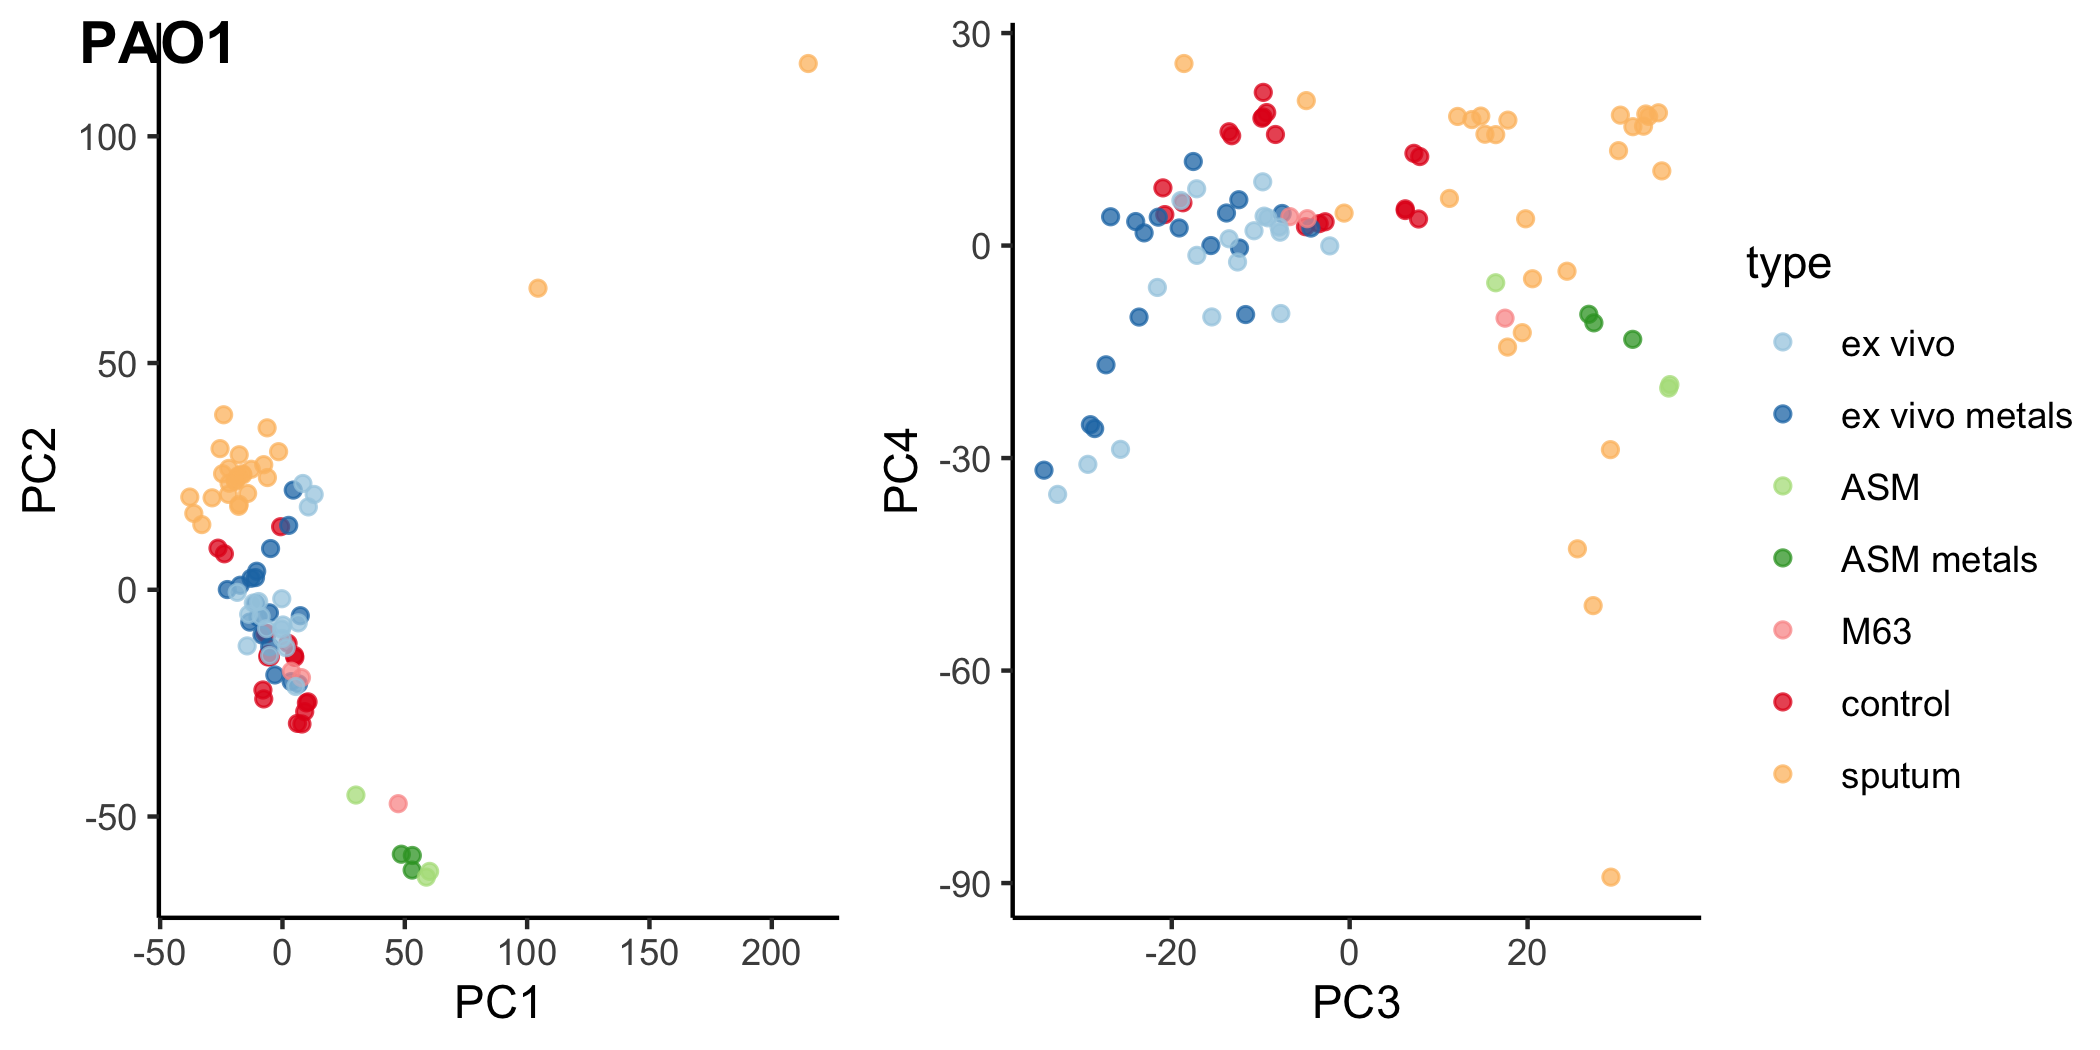

In [23]:
pc1_pc2_plt <- ggplot(pc_pao1_df, aes(x = PC1, y = PC2, color = type)) + 
  geom_point(alpha = .75) +
  theme_classic() +
  scale_color_brewer(palette = "Paired")

pc3_pc4_plt <- ggplot(pc_pao1_df, aes(x = PC3, y = PC4, color = type)) + 
  geom_point(alpha = .75) +
  theme_classic() +
  scale_color_brewer(palette = "Paired")

ggarrange(pc1_pc2_plt, pc3_pc4_plt, common.legend = T, legend = "right", labels = c("PAO1", ""))